In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("F:\Courses\Complete Guide to TensorFlow for Deep Learning with Python\Complete Guide to TensorFlow for Deep Learning with Python\Tensorflow-Bootcamp-master\My Other Notebooks\Titanic Dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def computeAge(col):
    Age = col[0]
    Class = col[1]
    if pd.isnull(Age):
        if Class == 1:
            return 37
        elif Class ==2:
            return 30
        elif Class ==3:
            return 23
    else:
        return Age
    
df['Age'] = df[['Age','Pclass']].apply(computeAge,axis=1)

In [4]:
df.drop(labels='Cabin',axis=1,inplace=True)
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
df = pd.concat([df,sex,embark],axis=1)
df.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


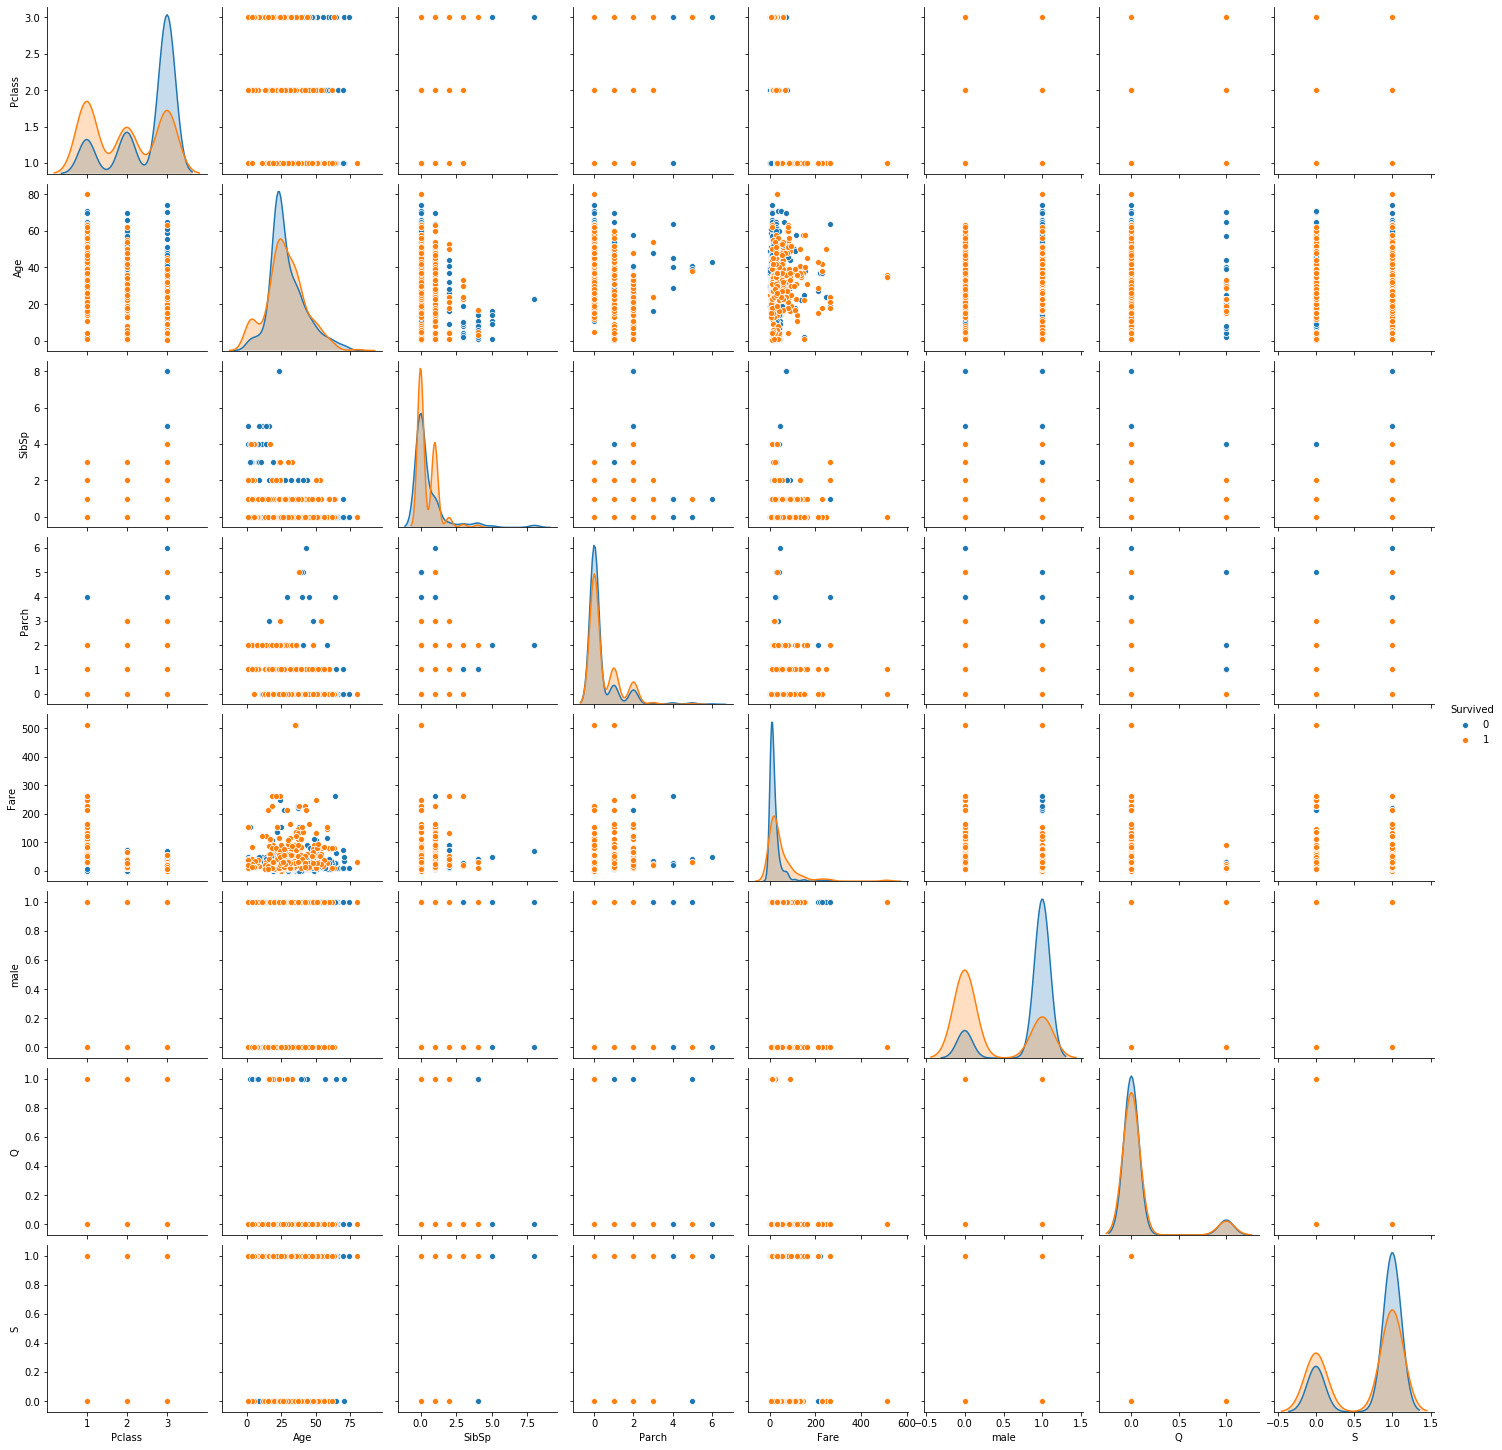

In [6]:
sns.pairplot(data=df,hue='Survived')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop(['Survived'],axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [9]:
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()

In [10]:
Model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
predictions = Model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print("\n\n\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79       169
           1       0.73      0.61      0.67       126

    accuracy                           0.74       295
   macro avg       0.74      0.72      0.73       295
weighted avg       0.74      0.74      0.73       295





[[141  28]
 [ 49  77]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
Model2 = RandomForestClassifier(n_estimators=200)

In [17]:
Model2.fit(X_train,y_train)
predictions = Model2.predict(X_test)
print(classification_report(y_test,predictions))
print("\n\n\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       169
           1       0.77      0.71      0.74       126

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.78       295





[[143  26]
 [ 37  89]]


In [31]:
'''Now to find best Number of trees in random forest for this dataset'''
error_rate=[]

for i in range(1,250):
    Model2 = RandomForestClassifier(n_estimators=i)
    Model2.fit(X_train,y_train)
    predictions = Model2.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

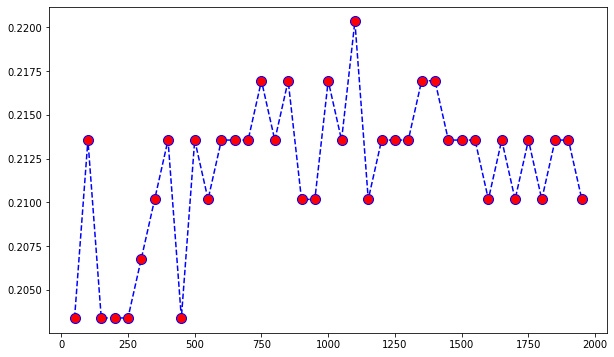

In [30]:
#Linestyle is the way line drwan, marker tells where actually points are in plot
plt.figure(figsize=(10,6)) #To make our graph size bigger
plt.plot(range(50,2000,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.show()

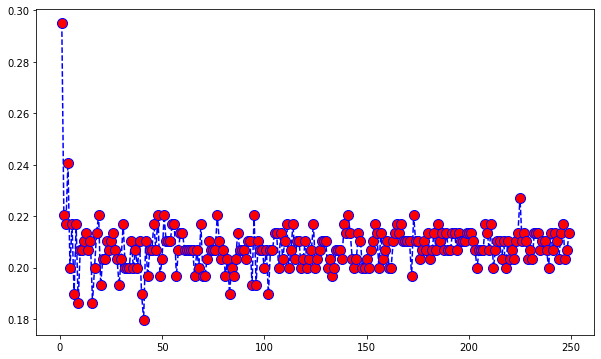

In [32]:
#Linestyle is the way line drwan, marker tells where actually points are in plot
plt.figure(figsize=(10,6)) #To make our graph size bigger
plt.plot(range(1,250),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.show()

In [ ]:
'''Finally we have a point near 40-50 which gives less error then 0.18'''